### Download the dataset
#### I have taken subset of following dataset
#### Dataset credits: https://www.kaggle.com/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten


In [12]:
!pip install gdown 
import gdown

url="https://drive.google.com/file/d/1WHT4GWMj8YnEwPwPgVehcwx8Xk0jHQcQ/view?usp=drive_link"
output="data.zip"

gdown.download(url=url, output=output, fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1WHT4GWMj8YnEwPwPgVehcwx8Xk0jHQcQ
From (redirected): https://drive.google.com/uc?id=1WHT4GWMj8YnEwPwPgVehcwx8Xk0jHQcQ&confirm=t&uuid=8095c23c-4f39-4a7d-9c1d-320a826b1f08
To: /data/user/home/snayak/Verdant/VerdantFresh--Detecting-Freshness-Enhancing-Quality/data.zip
100%|██████████| 1.11G/1.11G [00:09<00:00, 111MB/s] 


'data.zip'

In [13]:
!ls 
!unzip "data.zip" -d "data"

data.zip  README.md  verdant.ipynb
Archive:  data.zip
   creating: data/fruits/
   creating: data/fruits/apple/
   creating: data/fruits/apple/Apple__Healthy/
  inflating: data/fruits/apple/Apple__Healthy/FreshApple (1).jpg  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (1).png  
  inflating: data/fruits/apple/Apple__Healthy/FreshApple (10).jpg  
  inflating: data/fruits/apple/Apple__Healthy/FreshApple (100).jpg  
  inflating: data/fruits/apple/Apple__Healthy/FreshApple (101).jpg  
  inflating: data/fruits/apple/Apple__Healthy/FreshApple (102).jpg  
  inflating: data/fruits/apple/Apple__Healthy/FreshApple (103).jpg  
  inflating: data/fruits/apple/Apple__Healthy/FreshApple (104).jpg  
  inflating: data/fruits/apple/Apple__Healthy/FreshApple (105).jpg  
  inflating: data/fruits/apple/Apple__Healthy/FreshApple (106).jpg  
  inflating: data/fruits/apple/Apple__Healthy/FreshApple (107).jpg  
  inflating: data/fruits/apple/Apple__Healthy/FreshApple (108).jpg  
  inflating: data/

  inflating: data/fruits/apple/Apple__Healthy/freshApple (235).jpg  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (236).jpg  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (237).jpg  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (238).jpg  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (239).jpg  
  inflating: data/fruits/apple/Apple__Healthy/FreshApple (24).jpg  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (240).jpg  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (241).jpg  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (242).jpg  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (243).jpg  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (244).jpg  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (245).jpg  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (246).jpg  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (247).jpg  
  inflating: data/fruits/apple/Appl

  inflating: data/fruits/apple/Apple__Healthy/freshApple (447).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (448).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (449).png  
  inflating: data/fruits/apple/Apple__Healthy/FreshApple (45).jpg  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (450).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (451).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (452).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (453).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (454).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (455).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (456).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (457).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (458).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (459).png  
  inflating: data/fruits/apple/Appl

  inflating: data/fruits/apple/Apple__Healthy/freshApple (560).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (561).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (562).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (563).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (564).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (565).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (566).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (567).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (568).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (569).png  
  inflating: data/fruits/apple/Apple__Healthy/FreshApple (57).jpg  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (570).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (571).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (572).png  
  inflating: data/fruits/apple/Appl

  inflating: data/fruits/apple/Apple__Healthy/FreshApple (67).jpg  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (670).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (671).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (672).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (673).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (674).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (675).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (676).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (677).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (678).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (679).png  
  inflating: data/fruits/apple/Apple__Healthy/FreshApple (68).jpg  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (680).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (681).png  
  inflating: data/fruits/apple/Apple

  inflating: data/fruits/apple/Apple__Healthy/FreshApple (79).jpg  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (790).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (791).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (792).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (793).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (794).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (795).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (796).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (797).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (798).png  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (799).png  
  inflating: data/fruits/apple/Apple__Healthy/FreshApple (8).jpg  
  inflating: data/fruits/apple/Apple__Healthy/FreshApple (80).jpg  
  inflating: data/fruits/apple/Apple__Healthy/freshApple (800).png  
  inflating: data/fruits/apple/Apple__

  inflating: data/fruits/apple/Apple__Healthy/rotated_by_15_Screen Shot 2018-06-08 at 5.05.34 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_15_Screen Shot 2018-06-08 at 5.05.41 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_15_Screen Shot 2018-06-08 at 5.05.48 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_15_Screen Shot 2018-06-08 at 5.06.10 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_15_Screen Shot 2018-06-08 at 5.06.19 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_15_Screen Shot 2018-06-08 at 5.06.33 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_15_Screen Shot 2018-06-08 at 5.06.40 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_15_Screen Shot 2018-06-08 at 5.06.47 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_15_Screen Shot 2018-06-08 at 5.06.54 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_15_Screen Shot 2

  inflating: data/fruits/apple/Apple__Healthy/rotated_by_15_Screen Shot 2018-06-08 at 5.20.51 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_15_Screen Shot 2018-06-08 at 5.20.56 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_15_Screen Shot 2018-06-08 at 5.21.06 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_15_Screen Shot 2018-06-08 at 5.21.22 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_15_Screen Shot 2018-06-08 at 5.21.31 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_15_Screen Shot 2018-06-08 at 5.21.40 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_15_Screen Shot 2018-06-08 at 5.21.44 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_15_Screen Shot 2018-06-08 at 5.21.51 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_15_Screen Shot 2018-06-08 at 5.21.56 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_15_Screen Shot 2

  inflating: data/fruits/apple/Apple__Healthy/rotated_by_30_Screen Shot 2018-06-08 at 5.03.26 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_30_Screen Shot 2018-06-08 at 5.03.47 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_30_Screen Shot 2018-06-08 at 5.03.59 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_30_Screen Shot 2018-06-08 at 5.04.05 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_30_Screen Shot 2018-06-08 at 5.04.11 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_30_Screen Shot 2018-06-08 at 5.04.16 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_30_Screen Shot 2018-06-08 at 5.04.24 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_30_Screen Shot 2018-06-08 at 5.04.31 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_30_Screen Shot 2018-06-08 at 5.04.48 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_30_Screen Shot 2

  inflating: data/fruits/apple/Apple__Healthy/rotated_by_30_Screen Shot 2018-06-08 at 5.19.58 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_30_Screen Shot 2018-06-08 at 5.20.08 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_30_Screen Shot 2018-06-08 at 5.20.26 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_30_Screen Shot 2018-06-08 at 5.20.32 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_30_Screen Shot 2018-06-08 at 5.20.51 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_30_Screen Shot 2018-06-08 at 5.20.56 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_30_Screen Shot 2018-06-08 at 5.21.06 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_30_Screen Shot 2018-06-08 at 5.21.22 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_30_Screen Shot 2018-06-08 at 5.21.31 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_30_Screen Shot 2

  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.00.50 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.01.01 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.01.08 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.01.15 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.01.29 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.01.34 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.02.08 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.02.31 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.02.38 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2

  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.14.56 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.15.01 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.15.09 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.15.14 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.15.28 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.15.34 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.15.39 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.15.45 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.15.52 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2

  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.29.13 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.29.18 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.29.31 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.32.33 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.32.38 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.32.43 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.32.50 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.33.05 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2018-06-08 at 5.33.11 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_45_Screen Shot 2

  inflating: data/fruits/apple/Apple__Healthy/rotated_by_60_Screen Shot 2018-06-08 at 5.13.31 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_60_Screen Shot 2018-06-08 at 5.13.40 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_60_Screen Shot 2018-06-08 at 5.13.45 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_60_Screen Shot 2018-06-08 at 5.13.54 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_60_Screen Shot 2018-06-08 at 5.14.01 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_60_Screen Shot 2018-06-08 at 5.14.20 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_60_Screen Shot 2018-06-08 at 5.14.48 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_60_Screen Shot 2018-06-08 at 5.14.56 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_60_Screen Shot 2018-06-08 at 5.15.01 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_60_Screen Shot 2

  inflating: data/fruits/apple/Apple__Healthy/rotated_by_60_Screen Shot 2018-06-08 at 5.33.18 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_60_Screen Shot 2018-06-08 at 5.33.27 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_60_Screen Shot 2018-06-08 at 5.33.55 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_60_Screen Shot 2018-06-08 at 5.34.01 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_60_Screen Shot 2018-06-08 at 5.34.14 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_60_Screen Shot 2018-06-08 at 5.34.21 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 4.59.44 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 4.59.49 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 4.59.57 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2

  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 5.15.39 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 5.15.45 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 5.15.52 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 5.16.06 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 5.16.16 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 5.16.28 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 5.16.33 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 5.16.44 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 5.16.57 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2

  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 5.32.43 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 5.33.11 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 5.33.18 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 5.33.27 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 5.33.33 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 5.33.47 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 5.33.55 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 5.34.01 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2018-06-08 at 5.34.07 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/rotated_by_75_Screen Shot 2

  inflating: data/fruits/apple/Apple__Healthy/saltandpepper_Screen Shot 2018-06-08 at 5.13.10 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/saltandpepper_Screen Shot 2018-06-08 at 5.13.18 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/saltandpepper_Screen Shot 2018-06-08 at 5.13.25 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/saltandpepper_Screen Shot 2018-06-08 at 5.13.31 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/saltandpepper_Screen Shot 2018-06-08 at 5.13.40 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/saltandpepper_Screen Shot 2018-06-08 at 5.13.54 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/saltandpepper_Screen Shot 2018-06-08 at 5.14.01 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/saltandpepper_Screen Shot 2018-06-08 at 5.14.07 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/saltandpepper_Screen Shot 2018-06-08 at 5.14.20 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/saltandpepper_Screen Shot 2

  inflating: data/fruits/apple/Apple__Healthy/saltandpepper_Screen Shot 2018-06-08 at 5.33.05 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/saltandpepper_Screen Shot 2018-06-08 at 5.33.11 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/saltandpepper_Screen Shot 2018-06-08 at 5.33.18 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/saltandpepper_Screen Shot 2018-06-08 at 5.33.27 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/saltandpepper_Screen Shot 2018-06-08 at 5.33.33 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/saltandpepper_Screen Shot 2018-06-08 at 5.33.47 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/saltandpepper_Screen Shot 2018-06-08 at 5.33.55 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/saltandpepper_Screen Shot 2018-06-08 at 5.34.07 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/saltandpepper_Screen Shot 2018-06-08 at 5.34.21 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/Screen Shot 2018-06-08 at 4

  inflating: data/fruits/apple/Apple__Healthy/Screen Shot 2018-06-08 at 5.16.49 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/Screen Shot 2018-06-08 at 5.16.57 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/Screen Shot 2018-06-08 at 5.17.04 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/Screen Shot 2018-06-08 at 5.17.10 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/Screen Shot 2018-06-08 at 5.17.22 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/Screen Shot 2018-06-08 at 5.17.34 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/Screen Shot 2018-06-08 at 5.17.42 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/Screen Shot 2018-06-08 at 5.18.12 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/Screen Shot 2018-06-08 at 5.18.16 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/Screen Shot 2018-06-08 at 5.18.26 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/Screen Shot 2018-06-08 at 5.18.37 PM.png  
  inflating: data/fru

  inflating: data/fruits/apple/Apple__Healthy/translation_Screen Shot 2018-06-08 at 5.02.48 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/translation_Screen Shot 2018-06-08 at 5.02.54 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/translation_Screen Shot 2018-06-08 at 5.03.05 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/translation_Screen Shot 2018-06-08 at 5.03.26 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/translation_Screen Shot 2018-06-08 at 5.03.34 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/translation_Screen Shot 2018-06-08 at 5.03.40 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/translation_Screen Shot 2018-06-08 at 5.03.47 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/translation_Screen Shot 2018-06-08 at 5.03.59 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/translation_Screen Shot 2018-06-08 at 5.04.05 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/translation_Screen Shot 2018-06-08 at 5.04.11

  inflating: data/fruits/apple/Apple__Healthy/translation_Screen Shot 2018-06-08 at 5.19.15 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/translation_Screen Shot 2018-06-08 at 5.19.35 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/translation_Screen Shot 2018-06-08 at 5.19.47 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/translation_Screen Shot 2018-06-08 at 5.19.58 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/translation_Screen Shot 2018-06-08 at 5.20.08 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/translation_Screen Shot 2018-06-08 at 5.20.17 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/translation_Screen Shot 2018-06-08 at 5.20.26 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/translation_Screen Shot 2018-06-08 at 5.20.32 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/translation_Screen Shot 2018-06-08 at 5.20.42 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/translation_Screen Shot 2018-06-08 at 5.20.56

  inflating: data/fruits/apple/Apple__Healthy/vertical_flip_Screen Shot 2018-06-08 at 5.02.31 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/vertical_flip_Screen Shot 2018-06-08 at 5.02.38 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/vertical_flip_Screen Shot 2018-06-08 at 5.02.43 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/vertical_flip_Screen Shot 2018-06-08 at 5.02.48 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/vertical_flip_Screen Shot 2018-06-08 at 5.02.54 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/vertical_flip_Screen Shot 2018-06-08 at 5.03.05 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/vertical_flip_Screen Shot 2018-06-08 at 5.03.10 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/vertical_flip_Screen Shot 2018-06-08 at 5.03.17 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/vertical_flip_Screen Shot 2018-06-08 at 5.03.26 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/vertical_flip_Screen Shot 2

  inflating: data/fruits/apple/Apple__Healthy/vertical_flip_Screen Shot 2018-06-08 at 5.18.16 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/vertical_flip_Screen Shot 2018-06-08 at 5.18.42 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/vertical_flip_Screen Shot 2018-06-08 at 5.18.51 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/vertical_flip_Screen Shot 2018-06-08 at 5.18.58 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/vertical_flip_Screen Shot 2018-06-08 at 5.19.15 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/vertical_flip_Screen Shot 2018-06-08 at 5.19.28 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/vertical_flip_Screen Shot 2018-06-08 at 5.19.35 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/vertical_flip_Screen Shot 2018-06-08 at 5.19.47 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/vertical_flip_Screen Shot 2018-06-08 at 5.19.58 PM.png  
  inflating: data/fruits/apple/Apple__Healthy/vertical_flip_Screen Shot 2

  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-07 at 2.16.54 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-07 at 2.17.15 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-07 at 2.17.25 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-07 at 2.18.13 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-07 at 2.18.57 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-07 at 2.19.15 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-07 at 2.19.46 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-07 at 2.20.04 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-07 at 2.20.34 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-07 

  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-07 at 2.54.41 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-07 at 2.54.58 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-07 at 2.55.52 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-07 at 2.56.09 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-07 at 2.56.16 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-07 at 2.56.34 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-07 at 2.56.47 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-07 at 2.57.05 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-07 at 2.57.13 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-07 

  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-08 at 2.30.51 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-08 at 2.30.57 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-08 at 2.31.03 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-08 at 2.31.08 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-08 at 2.31.16 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-08 at 2.31.23 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-08 at 2.31.33 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-08 at 2.31.45 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-08 at 2.32.42 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-08 

  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-08 at 2.52.20 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-08 at 2.52.43 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-08 at 2.52.57 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_15_Screen Shot 2018-06-08 at 2.53.14 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-07 at 2.15.20 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-07 at 2.15.34 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-07 at 2.15.50 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-07 at 2.16.18 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-07 at 2.16.41 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-07 

  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-07 at 2.57.13 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-07 at 2.57.26 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-07 at 2.57.42 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-07 at 2.57.49 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-07 at 2.58.04 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-07 at 2.58.17 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-07 at 2.58.30 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-07 at 2.58.57 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-07 at 2.59.13 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-07 

  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-08 at 2.34.05 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-08 at 2.34.37 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-08 at 2.34.42 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-08 at 2.34.51 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-08 at 2.35.10 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-08 at 2.35.25 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-08 at 2.35.32 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-08 at 2.35.37 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-08 at 2.36.01 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_30_Screen Shot 2018-06-08 

  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-07 at 2.20.04 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-07 at 2.20.29 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-07 at 2.20.34 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-07 at 2.20.46 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-07 at 2.21.09 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-07 at 2.22.00 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-07 at 2.22.39 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-07 at 2.23.40 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-07 at 2.23.51 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-07 

  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-07 at 2.54.41 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-07 at 2.54.49 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-07 at 2.54.58 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-07 at 2.55.27 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-07 at 2.55.52 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-07 at 2.56.09 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-07 at 2.56.16 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-07 at 2.56.47 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-07 at 2.57.05 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-07 

  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-08 at 2.38.54 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-08 at 2.39.21 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-08 at 2.39.35 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-08 at 2.39.51 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-08 at 2.40.09 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-08 at 2.40.13 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-08 at 2.40.30 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-08 at 2.40.38 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-08 at 2.40.46 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_45_Screen Shot 2018-06-08 

  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-07 at 2.37.01 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-07 at 2.37.11 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-07 at 2.37.53 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-07 at 2.38.04 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-07 at 2.38.13 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-07 at 2.38.28 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-07 at 2.38.38 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-07 at 2.38.49 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-07 at 2.38.59 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-07 

  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-07 at 2.59.09 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-07 at 2.59.13 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-07 at 2.59.23 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-07 at 2.59.38 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-07 at 2.59.52 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-07 at 3.00.00 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-07 at 3.00.25 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-07 at 3.00.33 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-07 at 3.00.40 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-07 

  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-08 at 2.42.06 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-08 at 2.42.22 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-08 at 2.42.38 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-08 at 2.42.52 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-08 at 2.42.58 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-08 at 2.43.29 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-08 at 2.44.54 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-08 at 2.45.44 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-08 at 2.45.50 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_60_Screen Shot 2018-06-08 

  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-07 at 2.40.13 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-07 at 2.40.28 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-07 at 2.40.48 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-07 at 2.40.55 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-07 at 2.41.07 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-07 at 2.41.14 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-07 at 2.42.18 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-07 at 2.42.25 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-07 at 2.42.37 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-07 

  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-07 at 3.03.02 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-07 at 3.03.12 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-07 at 3.03.21 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-07 at 3.03.31 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-07 at 3.03.38 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-07 at 3.03.46 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-07 

  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-08 at 2.39.26 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-08 at 2.39.35 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-08 at 2.39.51 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-08 at 2.40.09 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-08 at 2.40.30 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-08 at 2.40.56 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-08 at 2.41.16 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-08 at 2.41.39 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-08 at 2.41.44 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/rotated_by_75_Screen Shot 2018-06-08 

  inflating: data/fruits/apple/Apple__Rotten/rottenApple (147).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (148).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (149).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (15).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (150).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (151).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (152).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (153).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (154).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (155).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (156).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (157).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (158).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (159).jpg  
  inflating: data/fruits/apple/Appl

  inflating: data/fruits/apple/Apple__Rotten/rottenApple (257).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (258).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (259).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (26).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (260).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (261).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (262).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (263).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (264).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (265).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (266).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (267).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (268).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (269).jpg  
  inflating: data/fruits/apple/Appl

  inflating: data/fruits/apple/Apple__Rotten/rottenApple (367).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (368).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (369).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (37).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (370).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (371).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (372).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (373).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (374).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (375).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (376).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (377).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (378).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (379).jpg  
  inflating: data/fruits/apple/Appl

  inflating: data/fruits/apple/Apple__Rotten/rottenApple (489).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (49).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (490).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (491).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (492).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (493).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (494).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (495).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (496).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (497).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (498).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (499).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (5).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (5).webp  
  inflating: data/fruits/apple/Apple__

  inflating: data/fruits/apple/Apple__Rotten/rottenApple (74).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (75).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (76).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (77).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (78).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (79).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (8).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (80).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (81).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (82).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (83).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (84).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (85).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rottenApple (86).jpg  
  inflating: data/fruits/apple/Apple__Rotten/rott

  inflating: data/fruits/apple/Apple__Rotten/saltandpepper_Screen Shot 2018-06-07 at 2.47.27 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/saltandpepper_Screen Shot 2018-06-07 at 2.47.35 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/saltandpepper_Screen Shot 2018-06-07 at 2.47.50 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/saltandpepper_Screen Shot 2018-06-07 at 2.50.09 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/saltandpepper_Screen Shot 2018-06-07 at 2.50.31 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/saltandpepper_Screen Shot 2018-06-07 at 2.50.43 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/saltandpepper_Screen Shot 2018-06-07 at 2.51.08 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/saltandpepper_Screen Shot 2018-06-07 at 2.51.16 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/saltandpepper_Screen Shot 2018-06-07 at 2.51.37 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/saltandpepper_Screen Shot 2018-06-07 

  inflating: data/fruits/apple/Apple__Rotten/saltandpepper_Screen Shot 2018-06-08 at 2.28.42 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/saltandpepper_Screen Shot 2018-06-08 at 2.29.33 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/saltandpepper_Screen Shot 2018-06-08 at 2.29.55 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/saltandpepper_Screen Shot 2018-06-08 at 2.30.26 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/saltandpepper_Screen Shot 2018-06-08 at 2.30.31 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/saltandpepper_Screen Shot 2018-06-08 at 2.30.40 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/saltandpepper_Screen Shot 2018-06-08 at 2.30.45 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/saltandpepper_Screen Shot 2018-06-08 at 2.30.51 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/saltandpepper_Screen Shot 2018-06-08 at 2.31.03 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/saltandpepper_Screen Shot 2018-06-08 

  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.16.41 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.17.15 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.17.25 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.18.13 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.18.57 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.19.15 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.19.37 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.19.46 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.20.29 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.20.46 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.20.56 PM.png  
  inflating: data/fruits/apple/A

  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.56.09 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.56.16 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.56.34 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.56.57 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.57.05 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.57.13 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.57.17 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.57.26 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.57.42 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.57.49 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-07 at 2.58.17 PM.png  
  inflating: data/fruits/apple/A

  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-08 at 2.38.54 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-08 at 2.39.02 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-08 at 2.39.21 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-08 at 2.39.26 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-08 at 2.39.35 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-08 at 2.40.09 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-08 at 2.40.13 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-08 at 2.40.30 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-08 at 2.40.38 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-08 at 2.40.46 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/Screen Shot 2018-06-08 at 2.40.56 PM.png  
  inflating: data/fruits/apple/A

  inflating: data/fruits/apple/Apple__Rotten/translation_Screen Shot 2018-06-07 at 2.43.07 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/translation_Screen Shot 2018-06-07 at 2.43.13 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/translation_Screen Shot 2018-06-07 at 2.43.26 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/translation_Screen Shot 2018-06-07 at 2.43.34 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/translation_Screen Shot 2018-06-07 at 2.43.48 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/translation_Screen Shot 2018-06-07 at 2.43.54 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/translation_Screen Shot 2018-06-07 at 2.44.05 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/translation_Screen Shot 2018-06-07 at 2.44.36 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/translation_Screen Shot 2018-06-07 at 2.44.51 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/translation_Screen Shot 2018-06-07 at 2.45.09 PM.png  


  inflating: data/fruits/apple/Apple__Rotten/translation_Screen Shot 2018-06-08 at 2.25.43 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/translation_Screen Shot 2018-06-08 at 2.26.09 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/translation_Screen Shot 2018-06-08 at 2.26.14 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/translation_Screen Shot 2018-06-08 at 2.26.55 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/translation_Screen Shot 2018-06-08 at 2.27.15 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/translation_Screen Shot 2018-06-08 at 2.27.44 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/translation_Screen Shot 2018-06-08 at 2.28.07 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/translation_Screen Shot 2018-06-08 at 2.28.23 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/translation_Screen Shot 2018-06-08 at 2.28.42 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/translation_Screen Shot 2018-06-08 at 2.29.20 PM.png  


  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-07 at 2.17.25 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-07 at 2.18.13 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-07 at 2.18.25 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-07 at 2.18.57 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-07 at 2.19.15 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-07 at 2.19.37 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-07 at 2.19.46 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-07 at 2.20.34 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-07 at 2.20.46 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-07 

  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-07 at 2.55.27 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-07 at 2.55.52 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-07 at 2.56.09 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-07 at 2.56.16 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-07 at 2.56.34 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-07 at 2.56.47 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-07 at 2.56.57 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-07 at 2.57.05 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-07 at 2.57.13 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-07 

  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-08 at 2.32.42 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-08 at 2.33.04 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-08 at 2.34.05 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-08 at 2.34.42 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-08 at 2.34.47 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-08 at 2.34.51 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-08 at 2.35.03 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-08 at 2.35.10 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-08 at 2.35.25 PM.png  
  inflating: data/fruits/apple/Apple__Rotten/vertical_flip_Screen Shot 2018-06-08 

In [14]:
pip install split-folders

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models,layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2

import os
import glob
import shutil
import matplotlib.pyplot as plt
import numpy as np
import splitfolders 

from IPython.display import HTML

2025-03-08 00:40:26.372885: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741416026.718258   87745 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741416026.880874   87745 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-08 00:40:27.755367: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

[]


2025-03-08 00:41:55.097814: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-03-08 00:41:55.097905: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: c0242
2025-03-08 00:41:55.097919: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: c0242
2025-03-08 00:41:55.098025: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:168] libcuda reported version is: 550.90.7
2025-03-08 00:41:55.098069: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:172] kernel reported version is: 550.90.7
2025-03-08 00:41:55.098075: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:259] kernel version seems to match DSO: 550.90.7


In [17]:
BATCH_SIZE=32
IMAGE_SIZE=(256,256)
CHANNELS=3
EPOCHS=15

In [18]:
#Parameters
directory = "data/fruits/apple"
interpolation='bilinear'

In [19]:
splitfolders.ratio(directory, seed=41, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 5368 files [01:30, 59.32 files/s]


In [23]:
# !ls data/fruits/apple
# !ls /output/
!ls "data/fruits/apple"

Apple__Healthy	Apple__Rotten


In [24]:
train_dir="output/train"
test_dir="output/test"
val_dir="output/val"

In [25]:
class_names = os.listdir(test_dir) 
class_names

['Apple__Healthy', 'Apple__Rotten']

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE
)

Found 4290 files belonging to 2 classes.


I0000 00:00:1741168410.996808   62639 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79078 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:25:00.0, compute capability: 8.0


Found 536 files belonging to 2 classes.
Found 537 files belonging to 2 classes.


In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(*IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [13]:
input_shape = (BATCH_SIZE, *IMAGE_SIZE, CHANNELS)
n_classes = 2

import tensorflow as tf
from tensorflow.keras import layers, models

input_shape = (BATCH_SIZE, *IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(), 
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

/home/snayak/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [184]:
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (32, 254, 254, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ (32, 125, 125, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_67          │ (32, 60, 60, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_72 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (32, 57600)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (32, 128)              │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_68          │ (32, 128)              │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (32, 2)                │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,430,658 (28.35 MB)

 Trainable params: 7,430,082 (28.34 MB)

 Non-trainable params: 576 (2.25 KB)

In [14]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) 
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)

In [15]:
class_weights = {0: 1.2, 1: 1.0}  

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=15,
    class_weight=class_weights
)

Epoch 1/15


2025-03-05 03:53:39.573868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
I0000 00:00:1741168425.564693   62949 service.cc:148] XLA service 0x2aad70004c10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741168425.564815   62949 service.cc:156]   StreamExecutor device (0): NVIDIA A100 80GB PCIe, Compute Capability 8.0
2025-03-05 03:53:45.617338: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741168425.889541   62949 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1741168433.794338   62949 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


135/135 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.8393 - loss: 0.5118 - val_accuracy: 0.4739 - val_loss: 0.9877
Epoch 2/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9154 - loss: 0.2182 - val_accuracy: 0.4720 - val_loss: 1.1606
Epoch 3/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9599 - loss: 0.1209 - val_accuracy: 0.7705 - val_loss: 0.4976
Epoch 4/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9771 - loss: 0.0696 - val_accuracy: 0.6810 - val_loss: 0.9749
Epoch 5/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9838 - loss: 0.0630 - val_accuracy: 0.9739 - val_loss: 0.0884
Epoch 6/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9932 - loss: 0.0257 - val_accuracy: 0.9664 - val_loss: 0.1279
Epoch 7/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9976 - loss: 0.0134 - val_accuracy: 0.9328 - val_loss: 0.2299
Epoch 8/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9985 - loss: 0.0111 - val_accuracy: 0.96

In [17]:
loss, accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9868 - loss: 0.0460
Test Accuracy: 0.9870
Test Loss: 0.0405


In [30]:
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    pred_labels = np.argmax(predictions, axis=1)
    print("Predicted labels:", pred_labels)
    print("True labels:", labels.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted labels: [1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1]
True labels: [1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1]


2025-03-05 03:55:39.562243: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [31]:
acc, loss = history.history['accuracy'], history.history['loss']
val_acc, val_loss = history.history['val_accuracy'], history.history['val_loss']

Text(0.5, 1.0, 'training and validation loss')

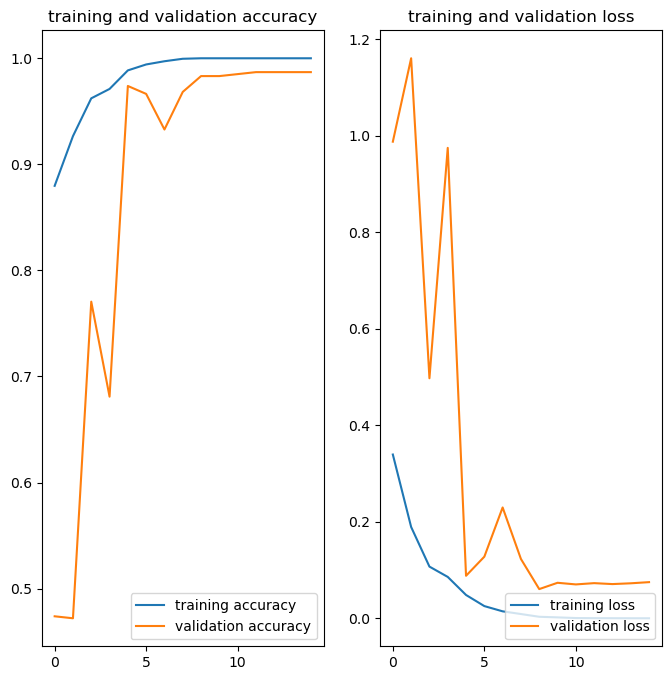

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='training accuracy')
plt.plot(range(EPOCHS),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='training loss')
plt.plot(range(EPOCHS),val_loss,label='validation loss')
plt.legend(loc='lower right')
plt.title('training and validation loss')

In [45]:
def predict(img_path, model):
    img = image.load_img(img_path)
    # Add batch dimension
    img_array = np.expand_dims(img, axis=0)  
    pred = model(img_array,training=False)
    pred_label = class_names[int(np.argmax(pred, axis=1))]  # Get class label

    return pred_label

/scratch/local/ipykernel_62639/771254246.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_label = class_names[int(np.argmax(pred, axis=1))]  # Get class label


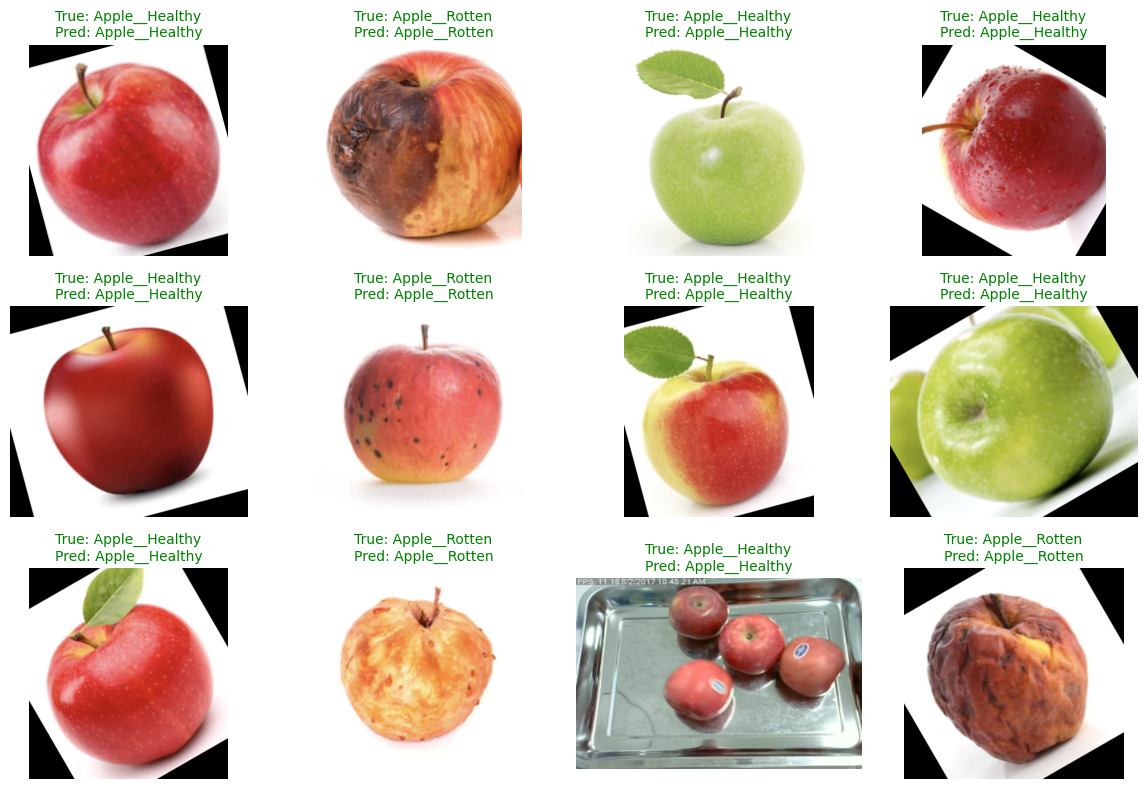

In [46]:
# Get all image paths from test directory
image_paths = []
true_labels = []

for class_name in class_names:
    class_dir = os.path.join(test_dir, class_name)
    for img_name in os.listdir(class_dir):
        image_paths.append(os.path.join(class_dir, img_name))
        true_labels.append(class_name)

# Select 12 random images for visualization
num_images = 12
random_indices = np.random.choice(len(image_paths), num_images, replace=False)
selected_images = [image_paths[i] for i in random_indices]
selected_labels = [true_labels[i] for i in random_indices]

# Function to predict and visualize
def predict_and_visualize(model, img_paths, true_labels):
    plt.figure(figsize=(12, 8))

    for i, img_path in enumerate(img_paths):
        img = image.load_img(img_path)
        pred_label = predict(img_path,model)
        
        # Display image with prediction
        plt.subplot(3, 4, i + 1)
        plt.imshow(np.array(img).astype("uint8")) 
        plt.title(f"True: {true_labels[i]}\nPred: {pred_label}", fontsize=10, 
                  color="green" if true_labels[i] == pred_label else "red")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

predict_and_visualize(model, selected_images, selected_labels)


In [62]:
models_dir = "models"

os.makedirs(models_dir, exist_ok=True)
existing_versions = [int(i.split('.')[0]) for i in os.listdir(models_dir)]
model_version = max(existing_versions + [0]) + 1

model.save(f"{models_dir}/{model_version}.keras")

print(f"Model saved as: {models_dir}/{model_version}.keras")

Model saved as: models/1.keras
